In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mxnet.ndarray as nd
# import seaborn as sns

# Easily Profile Python Code in Jupyter
# install conda install line_profiler or pip install line-profiler
# see http://mortada.net/easily-profile-python-code-in-jupyter.html
%load_ext line_profiler


In [13]:
a = nd.array([1,2,None,4])
[i+2 for i in a]

[
 [ 3.]
 <NDArray 1 @cpu(0)>, 
 [ 4.]
 <NDArray 1 @cpu(0)>, 
 [ nan]
 <NDArray 1 @cpu(0)>, 
 [ 6.]
 <NDArray 1 @cpu(0)>]

[System Requirements for MATLAB Engine API for Python](http://cn.mathworks.com/help/matlab/matlab_external/system-requirements-for-matlab-engine-for-python.html)

Ref:
- [Start and Stop MATLAB Engine for Python](http://cn.mathworks.com/help/matlab/matlab_external/start-the-matlab-engine-for-python.html)

In [11]:
import io
import matlab.engine
out = io.StringIO()
err = io.StringIO()
eng = matlab.engine.start_matlab()

In [8]:
eng.quit()

Ref: 
- [Call User Script and Function from Python](http://cn.mathworks.com/help/matlab/matlab_external/call-user-script-and-function-from-python.html)

In [3]:
!ls

GetColoredNoise.ipynb ZERO_DET_high_P.txt   iLIGOSensitivity.txt
GetLigoNoise.m        genligonoise.m        psd_zero.txt


In [4]:
# Matlab编辑
eng.edit('GetLigoNoise',nargout=0)
!ls

GetColoredNoise.ipynb ZERO_DET_high_P.txt   iLIGOSensitivity.txt
GetLigoNoise.m        genligonoise.m        psd_zero.txt


With the band-pass filtering that selects the region of 35 to 1024 Hz.

In [5]:
file = 'ZERO_DET_high_P.txt' # File containing target sensitivity curve
# Select pass band.
fLow = 9 #Hz 
fHigh = 9000 #Hz
Debug = True
# eng.GetLigoNoise(file, fLow, fHigh, Debug, nargout=0, stdout=out,stderr=err)
# Sampling frequency of the data to be generated (should be less than half
# of the maximum frequency in target PSD.
# fs = 4096;%Hz
# FIR filter order
# filtOrdr = 100;
# impDataNSamples = 2048;
# nDataSamples = 16384;

In [7]:
eng.GetLigoNoise(file, fLow, fHigh, True, stdout=out,stderr=err)

In [4]:
def Noise_fromLigo():
    Noise_Ligo = eng.GetLigoNoise(file, fLow, fHigh, False, stdout=out,stderr=err)
#     print(err.getvalue())
#     print(out.getvalue())
    return np.array(Noise_Ligo)[0]
Noise_fromLigo().shape

(8192,)

shape:  (8192,)
mean:  -6.9483382053e-26
std:  6.19714567657e-24
std:  1.0
The number of samples of white noise: 8192


/Users/Herb/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2966: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


(1e-25, 1e-21)

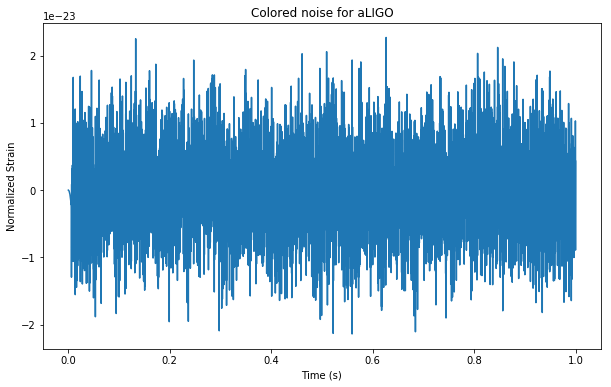

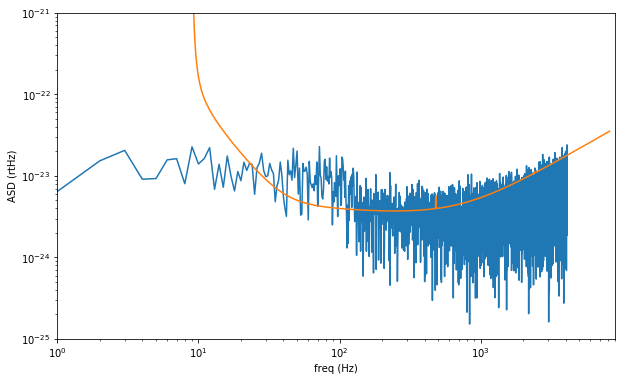

In [6]:
nsample = 8192
# Make plot for check 
randomSeries = Noise_fromLigo()
# sns.set_context("notebook")
# sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.plot(np.linspace(0,1,nsample) ,randomSeries)
# plt.plot(np.linspace(0,1,nsample) ,(randomSeries-randomSeries.mean())/randomSeries.std())
plt.xlabel('Time (s)')
plt.ylabel('Normalized Strain')
plt.title('Colored noise for aLIGO')
print('shape: ' ,randomSeries.shape)
print('mean: ', randomSeries.mean())
print('std: ', randomSeries.std())

# Normalized strain
dd = (randomSeries-randomSeries.mean())/randomSeries.std()
print('std: ' , dd.std())

# Check the randomSeries for aLIGO
f = np.fft.fftfreq(nsample ) * nsample
psd0 = np.abs(np.fft.fft(randomSeries))**2 / len(randomSeries)
print('The number of samples of white noise: %s' %len(randomSeries))

# sns.set_context("notebook")
# sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.loglog(f[f>=0][1:], np.sqrt(psd0[f>=0])[1:] )
ZERO_DET = np.loadtxt('./ZERO_DET_high_P.txt')
plt.loglog(ZERO_DET[:,0],ZERO_DET[:,1])   # Frequency(Hz) , ASD(Strain/Hz)
plt.xlabel('freq (Hz)')
plt.ylabel('ASD (rtHz)')
plt.xlim(fLow-10, fHigh+10)
plt.ylim(1e-25,1e-21)
# plt.grid()

In [7]:
# The color of the noise matches a PSD which you provide
def normalized_noise(randomSeries, sigma=5.0):
    return sigma * (randomSeries-randomSeries.mean())/randomSeries.std()
# Creat a set of noise time series

def NormNoise(data_GW_shape, sigma):
    num = data_GW_shape
    y = []
    i = 0
    while i < num:   				
#         y.append(normalized_noise(Noise_fromLigo(),sigma))
        y.append(Noise_fromLigo()) 
        i+=1
        #if i%5==0: print('%s of generating %s noises' %(i/num ,num))
    return y 			# A set of noise time series which have the same shape with data_GW

In [24]:
data_GW_shape = 10000
sigma = 1
data_noise = np.array(NormNoise(data_GW_shape, sigma))
data_noise.shape
# It may take 13 mins

(10000, 8192)

In [25]:
pd.DataFrame(data_noise).to_csv('../Noise_data2/LigoNose9_9000_8192_4.csv')
# It may take 4 mins

In [26]:
!ls ../Noise_data2/

LigoNose9_9000_8192_3.csv LigoNose9_9000_8192_4.csv


In [15]:
!ls ../Noise_data2/
# !rm ../Noise_data2/*

LigoNose9_9000_8192_5.csv


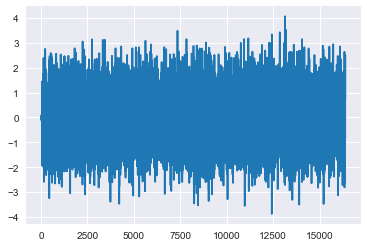

In [23]:
plt.plot(data_noise[0,:].tolist())

In [18]:
pd.read_csv('../Noise_data/LigoNose9_9000_8192_1.csv', index_col=0, nrows = 2)

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,-1.851416e-28,5.728589e-27,1.004643e-26,6.342425e-27,1.166781e-26,6.185404e-27,-2.206391e-27,1.294658e-27,8.455106e-27,1.304367e-26,...,-4.001126e-24,3.468656e-24,-8.126242e-24,-1.024269e-23,5.156548e-24,-2.056193e-23,1.893195e-24,-1.071452e-23,-1.233000e-23,3.161093e-24
1,5.228653e-27,5.393392e-27,-1.344599e-26,-8.472808e-27,-2.166755e-26,-2.130211e-26,-1.746924e-26,-3.991712e-27,-4.104665e-27,-1.878266e-26,...,-6.492246e-24,5.507373e-26,8.047780e-24,-3.599893e-24,3.835406e-24,-3.241442e-24,-4.989194e-24,3.402128e-24,-2.253202e-24,1.101215e-23


## Simulate Matlab

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mxnet.ndarray as nd

/Users/Herb/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:28: UserWarning: [Errno 28] No space left on device.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [64]:
def fir2(nn, ff, aa, **kwargs):
    '''http://read.pudn.com/downloads48/sourcecode/math/163974/fir2.m__.htm'''
    
    from scipy import ifft, real
    nn += 1
    ff = ff.reshape(1,-1)
    aa = aa.reshape(1,-1)
    assert len(kwargs) <= 3, 'Wrong number of input parameters!'

    npt = kwargs.setdefault('npt', None)
    lap = kwargs.setdefault('lap', None)
    wind = kwargs.setdefault('wind', None)
    
    length_kwargs = pd.Series(kwargs).count()
    
    if length_kwargs > 0:
        if length_kwargs == 1:
            if npt:
                if 2**round(np.log(npt)/np.log(2)) != npt:
                    npt = 2**round(np.log(npt)/np.log(2))
                wind = np.hamming(nn)
            else:
                wind = npt
                npt = 512
            lap = np.floor(npt/25)
        elif length_kwargs == 2:
            if npt ==1:
                if 2**round(np.log(npt)/np.log(2)) != npt:
                    npt = 2**round(np.log(npt)/np.log(2))
                if lap:
                    wind = np.hamming(nn)
                else:
                    wind = lap
                    lap = np.floor(npt/25)
            else:
                wind = npt
                npt = lap
                lap = np.floor(npt/25)
    elif length_kwargs == 0:
        if nn < 1024:
            npt = 512
        else:
            npt = 2**round(np.log(npt)/np.log(2))
        wind = np.hamming(nn)
        lap = np.floor(npt/25)

    assert nn == len(wind), print('The specified window must be the same as the filter length')

    [mf, nf] = ff.shape
    [ma, na] = aa.shape
    assert (mf == ma) and (nf == na), "You must specify the same number of frequencies and amplitudes"
    
    nbrk = np.maximum(mf, nf)  # length of the series
    if mf < nf:
        ff = ff.T
#         aa = aa.T

    assert (abs(ff[0]) <= np.spacing(1)) and (abs(ff[nbrk-1] -1) <=np.spacing(1)), 'The first frequency must be 0 and the last 1'
    
    # interpolate breakpoints onto large grid 
    H = np.zeros((1, npt+1))
    nint = nbrk-1
    df = np.diff(ff.conj().T)[0]
    assert any(np.diff(df) >= 0), "Frequencies must be non-decreasing"

    npt+= 1    # Length of [dc 1 2 ... nyquist] frequencies. 
    
    nb = 1
    H[0][0] = aa[0][0]
    
    for i in range(nint):
        
        if df[i] == 0:
            nb = int(nb - lap/2)
            ne = int(nb + lap)
        else:
            ne = int(np.floor(ff[i+1] * npt)[0])
            
        assert (nb >= 0) and (ne <= npt), "Too abrupt an amplitude change near end of frequency interval"
        
        j = np.arange(nb, ne+1)
        if nb == ne:
            inc = 0
        else:
            inc = (j-nb)/(ne - nb)

        H[0][nb-1:ne] = inc*aa[0][i+1] + (1 - inc)*aa[0][i]
        nb = ne + 1
    # Fourier time-shift. 
    dt = 0.5 * (nn -1)
    rad = -dt * 1j * np.pi * np.arange(npt) / (npt-1)
    H = H * np.exp(rad)
    H = np.concatenate((H, H[0][npt-2:0:-1].reshape(1,-1).conj()), axis=1) # Fourier transform of real series. 
    ht = real(ifft(H))    # Symmetric real series. 
    
    b = ht[0][:nn]  # Raw numerator. 
    b = b * wind.T  # Apply window. 
    a = 1           # Denominator. 
    return b

In [504]:
%timeit fir2(1000,np.array([0]+np.random.uniform(size=(100,)).tolist()+[1]), np.random.uniform(low=0, high=10, size=(102,)))
%lprun -f fir2 fir2(1000,np.array([0]+np.random.uniform(size=(100,)).tolist()+[1]), np.random.uniform(low=0, high=10, size=(102,)))

3.37 ms ± 236 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [505]:
from scipy import signal as sigs
sigs.firwin2(10,[0,0.2,0.6,1], [1,1,3,0])

array([ -9.72075622e-04,   2.26357059e-02,   1.80292599e-05,
        -5.12916098e-01,   1.02024504e+00,   1.02024504e+00,
        -5.12916098e-01,   1.80292599e-05,   2.26357059e-02,
        -9.72075622e-04])

In [544]:
b = fir2(10,np.array([0]+[0.4, 0.4]+[1]), np.array([1,1,2,2]))
sigs.filtfilt(b,a=1,x=np.linspace(1,35,35),padtype='odd')

array([  0.99048861,   1.98097722,   2.97146583,   3.96195443,
         4.95244304,   5.94293165,   6.93342026,   7.92390887,
         8.91439748,   9.90488608,  10.89537469,  11.8858633 ,
        12.87635191,  13.86684052,  14.85732913,  15.84781773,
        16.83830634,  17.82879495,  18.81928356,  19.80977217,
        20.80026078,  21.79074939,  22.78123799,  23.7717266 ,
        24.76221521,  25.75270382,  26.74319243,  27.73368104,
        28.72416964,  29.71465825,  30.70514686,  31.69563547,
        32.68612408,  33.67661269,  34.66710129])

In [117]:
any(np.diff(ff.T)[0] < 0)

True

In [73]:
def fftfilt(b, x, nfft=None):
    from scipy import fft, ifft
    m = x.shape[0]
    if m == 1:
        x = x.reshape((-1,1))  # turn row into a column
    nx = x.shape[0]
    
    if min(b.shape) > 1:
        assert b.shape[1] == x.shape[1] and x.shape[1] <=1, "signal:fftfilt:InvalidDimensions"
    else:
        b = b.reshape((-1,1))   # make input a column
    nb = b.shape[0]
    
    if nfft == None:
        # figure out which nfft and L to use
        if (nb >= nx) or (nb > 2**20):  # take a single FFT in this case
            nfft = 2**round(np.log(nb+nx-1)/np.log(2))
            L = nx
        else:
            fftflops = np.array([ 18,59,138,303,660,1441,3150,6875,14952,32373,69762,
                                 149647,319644,680105,1441974,3047619,6422736,13500637,
                                 28311786,59244791,59244791*2.09])
            n = 2**np.arange(1,22,1)
            validset = np.nonzero(n > (nb -1))[0]   # must have nfft > (nb-1)
            n = n[validset]
            fftflops = fftflops[validset]
            # minimize (number of blocks) * (number of flops per fft)
            L = n - (nb - 1)
            temp = np.ceil(nx/L) * fftflops
            dum, ind = np.min(temp), np.argmin(temp)
            nfft = n[ind]
            L = L[ind]
            
    else:  # nfft is given
        # Cast to enforce precision rules
        raise
        '''
        nfft = signal.internal.sigcasttofloat(nfft,'double','fftfilt','N','allownumeric');
        if nfft < nb
            nfft = nb;
        end
        nfft = 2.^(ceil(log(nfft)/log(2))); % force this to a power of 2 for speed
        L = nfft - nb + 1;        
        '''
    # Check the input data type. Single precision is not supported.
    '''
    try
        chkinputdatatype(b,x,nfft);
    catch ME
        throwAsCaller(ME);
    end'''
    B = fft(b.T, nfft).T
    if b.size == 1:
        B = B.T     # make sure fft of B is a column (might be a row if b is scalar)
    if b.shape[1] == 1:
        B = np.repeat(B, [x.shape[1],],axis=1)    # replicate the column B 
    if x.shape[1] == 1:
        x = np.repeat(x, [b.shape[1],],axis=1)   # replicate the column x 
    y = np.zeros_like(x)

    istart = 1
    while istart <= nx:
        iend = min(istart+L-1, nx)
        if (iend - istart) == 0:
            X = x[istart] * np.ones((nfft,1))  # need to fft a scalar
        else:
            X = fft(x[istart-1:iend,:].T, nfft).T
#         print(X)
#         print(B)
        Y = ifft((X * B).T).T
        yend = min(nx,istart+nfft-1)
#         print(istart, yend)
        y[istart-1:yend,:] = y[istart-1:yend,:] + Y[:(yend-istart+1),:]
        istart += L
    y = np.real(y)
    if (m == 1) and (y.shape[1] == 1):
        y = y.T    # turn column back into a row
    return y
    
# fs = 100
# t = np.linspace(0, 1, 101)
# x = np.sin(2*np.pi*t*3)+.25*np.sin(2*np.pi*t*40)
# b = np.ones((1,10))/10
# y = fftfilt(b, x.reshape((1,-1)))[0]


In [ ]:
istart = 2
istart * np.ones((3,1))

In [37]:
iend = 55
istart = 1
x.reshape((-1,1))[istart-1:iend,:].shape

(55, 1)

In [587]:
fft(x[istart-1:iend,:], nfft)

array([     16,      32,      64,     128,     256,     512,    1024,
          2048,    4096,    8192,   16384,   32768,   65536,  131072,
        262144,  524288, 1048576, 2097152])

In [563]:
b = np.ones((1,10))/10

In [549]:
x.T.shape

(101,)

In [601]:
grid_n = 128.0
ramp_n = 0.45
ll = np.array([0,0.2,0.5,0.2,0.5,0.8,0.9,0.9,1])
basell = ll.copy()
print(ll)
idx = np.argwhere(np.diff(ll) < 0).T[0]
print(idx)
ll[idx] = ll[idx+1] = (basell[idx]+ basell[idx+1])/2
print(ll)

[ 0.   0.2  0.5  0.2  0.5  0.8  0.9  0.9  1. ]
[2]
[ 0.    0.2   0.35  0.35  0.5   0.8   0.9   0.9   1.  ]


In [456]:
from scipy.fftpack import ifft
bb = ifft(np.concatenate([ll,ll[-2:0:-1]]))
grid_n = 8
n = 10
mid = (n+1)/2
2*grid_n-np.floor(mid)+1
2*grid_n

# bb[[range(2*grid_n-np.floor(mid).astype('int')+1, 2*grid_n + 1)]]
# np.ceil(mid).astype('int')
print(np.arange(2*grid_n-np.floor(mid)+1+1, 2*grid_n+1, dtype='int'))
bbb = np.linspace(1,16,16)
bbb[np.arange(2*grid_n-np.floor(mid)+1, 2*grid_n, dtype='int')]

[13 14 15 16]


array([ 13.,  14.,  15.,  16.])

In [431]:
# np.in(2*grid_n-np.floor(mid)+1, 2*grid_n,num=, dtype = 'int')
np.real(bb).reshape(-1,1)*np.hamming(16).reshape(-1,1)

array([[ 0.045     ],
       [-0.02556818],
       [-0.00102619],
       [ 0.00182893],
       [-0.0183776 ],
       [-0.02492477],
       [ 0.00403116],
       [-0.00866025],
       [ 0.        ],
       [-0.00797964],
       [ 0.00340295],
       [-0.01903615],
       [-0.01243288],
       [ 0.00106743],
       [-0.00052931],
       [-0.01707832]])

In [432]:
np.real(bb)*np.hamming(16)

array([ 0.045     , -0.02556818, -0.00102619,  0.00182893, -0.0183776 ,
       -0.02492477,  0.00403116, -0.00866025,  0.        , -0.00797964,
        0.00340295, -0.01903615, -0.01243288,  0.00106743, -0.00052931,
       -0.01707832])

In [439]:
np.real(bb).reshape(-1,1).shape[-1]

1

In [329]:
interp1d(xp, fp, kind='linear')(x.reshape(-1,1))

array([[ 9.86842105],
       [ 9.73684211],
       [ 9.93421053],
       [ 5.06578947],
       [ 7.63157895],
       [ 7.56578947],
       [ 7.5       ]])

In [328]:
x.reshape(-1,1)

array([[-180],
       [-170],
       [-185],
       [ 185],
       [ -10],
       [  -5],
       [   0]])

In [5]:
targetSens

array([[  9.00000000e+00,   1.73707227e-21],
       [  9.02047113e+00,   2.17351569e-21],
       [  9.04098882e+00,   2.92374984e-21],
       ..., 
       [  8.15486021e+03,   3.51734547e-23],
       [  8.17340901e+03,   3.52527968e-23],
       [  8.19200000e+03,   3.53323209e-23]])

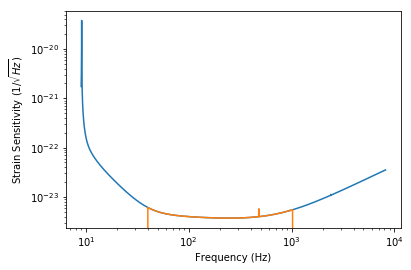

/Users/Herb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part


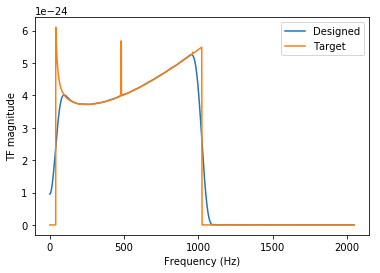

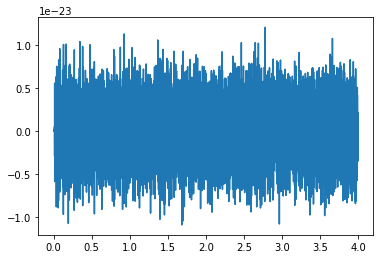

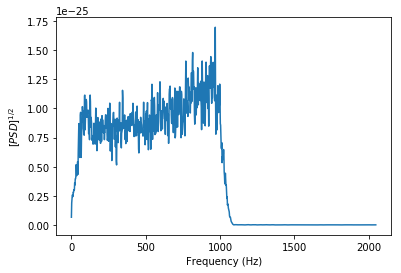

In [130]:
from scipy import fft
from scipy.signal import welch

# Generate simulated GW detector noise
# File containing target sensitivity curve (first column is frequency and
#  second column is square root of PSD).
targetSens = np.loadtxt('ZERO_DET_high_P.txt')

# Plot the target sensitivity.
plt.loglog(targetSens[:,0], targetSens[:,1])
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'Strain Sensitivity ($1/\sqrt{Hz}$)')

# Select pass band.
fLow = 40 #Hz
fHigh = 1024 #Hz
targetSens[(targetSens[:,0] <= fLow) + (targetSens[:,0] >=fHigh), 1] = 0
plt.loglog(targetSens[:,0], targetSens[:,1])
plt.show()

# Sampling frequency of the data to be generated (should be less than half
# of the maximum frequency in target PSD.
fs = 4096 #Hz

## Design filter
# B = fir2(N,F,A) designs an Nth order linear phase FIR digital filter with
# the frequency response specified by vectors F and A and returns the
# filter coefficients in length N+1 vector B.  The frequencies in F must be
# given in increasing order with 0.0 < F < 1.0 and 1.0 corresponding to
# half the sample rate.
##
# FIR filter order
filtOrdr = 100
##
# We only include frequencies up to the Nyquist frequency (half of sampling
# frequency) when designing the filter.
indxfCut = (targetSens[:,0] <= fs/2)
targetSens = targetSens[indxfCut, :]

# Add 0 frequency and corresponding PSD value
# as per the requirement of FIR2. Similarly add Nyquist frequency.
if targetSens[0,0] > 0:
    addZero = 1
else:
    addZero = 0

if targetSens[-1,0] < fs/2:
    addNyq = 1
else:
    addNyq = 0
##
if addZero:
    targetSens = np.concatenate((np.zeros((1,2)), targetSens))
if addNyq:
    targetSens = np.concatenate((targetSens, np.array([[fs/2, 0]])));
##
# Obtain filter coefficients. 
b = fir2(filtOrdr, targetSens[:,0]/(fs/2), targetSens[:,1])
##
# Compare target and designed quantities
# Get the impulse response
impDataNSamples = 2048
impSample = int(np.floor(impDataNSamples/2))
impVec = np.zeros((1,impDataNSamples))
impVec[0][impSample-1] = 1
impResp = fftfilt(b.reshape((-1,1)),impVec)
##
# Get the transfer function
designTf = fft(impResp)
##
# Plot the magnitude of the filter transfer function.
kNyq = int(np.floor(impDataNSamples/2)+1)
posFreq = np.arange(kNyq) * (1/(impDataNSamples/fs))
plt.plot(posFreq,abs(designTf[0][:kNyq]), label = 'Designed')
plt.plot(targetSens[:,0],targetSens[:,1], label = 'Target')
plt.ylabel('TF magnitude')
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.show()

## Generate noise
# Pass a white noise sequence through the designed filter.
nDataSamples = 16384
inputNoise = np.random.randn(1,nDataSamples)
outputNoise = fftfilt(b.reshape((-1,1)),inputNoise)[0]
plt.plot(np.arange((nDataSamples-1)+1)/fs, 
         outputNoise)
plt.show()
##
# Estimate PSD of simulated noise. *Note*: Scaling may be off because of
# (a) factors involved in discrete version of Wiener-Khinchin theorem, and
# (b) factors involved in how pwelch defines PSD. This can be easily
# corrected by multiplying with an overall factor (exercise: work out the
# factor!).
[f, pxx] = welch(x = outputNoise,nperseg=2048, fs = fs)
plt.plot(f, np.sqrt(pxx))

plt.xlabel('Frequency (Hz)')
plt.ylabel('$[PSD]^{1/2}$')
plt.show()

In [125]:
pxx.shape

(1025,)

In [104]:
np.arange((nDataSamples-1)/fs+1)

array([ 0.,  1.,  2.,  3.,  4.])

In [105]:
nDataSamples

16384